<a href="https://colab.research.google.com/github/rabnawaz172/ET/blob/main/ET_taif1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files

# Use the following command to upload a file from your computer
uploaded = files.upload()

Saving ET_Riaz_5.csv to ET_Riaz_5 (1).csv


In [15]:
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy
from sklearn.tree import DecisionTreeRegressor


In [16]:
import pandas as pd

# Assuming you uploaded a CSV file named 'my_dataset.csv'
file_name = 'ET_Riaz_5.csv'

# Read the uploaded CSV file into a DataFrame
df = pd.read_csv(file_name)

# Now, you can work with the DataFrame 'df' as you would with any other pandas DataFrame.

sns.set_theme(style="white", font_scale=1.5)
# Load the example planets dataset
df1=df.drop(['Day','Month','Year'],axis=1)
column_order = ['Tx', 'Tn', 'RH', 'u(x)','u2',  'e(a)', 'e(s)',  'Ra', 'n', 'N','Rs', 'Rnl', 'Rn', 'ETo']
df1 = df1[column_order]
df1


,Tx,Tn,RH,u(x),u2,e(a),e(s),Ra,n,N,Rs,Rnl,Rn,ETo
0,22.5,3.3,22.6,1.79,1.79,0.336,1.750,22.98,10.48,10.48,17.38,8.47,4.92,3.5
1,22.1,5.2,33.9,2.51,2.51,0.530,1.772,23.03,10.49,10.49,17.67,7.94,5.57,3.9
2,22.6,5.4,44.6,4.12,4.12,0.713,1.820,23.08,9.76,10.49,16.51,6.82,5.90,4.5
3,20.5,6.3,51.7,1.36,1.36,0.795,1.683,23.14,9.71,10.50,16.48,6.51,6.18,2.6
4,20.6,5.2,41.1,2.48,2.48,0.612,1.656,23.20,8.98,10.51,15.71,6.46,5.64,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,27.5,14.0,61.7,1.76,1.76,1.511,2.635,35.08,10.29,12.13,23.64,5.20,13.00,4.7
8121,27.0,11.5,51.1,2.09,2.09,1.141,2.461,35.22,10.74,12.16,24.36,6.00,12.76,5.1
8122,27.6,10.9,40.5,1.85,1.85,0.904,2.498,35.37,11.00,12.18,24.81,6.65,12.45,5.3
8123,29.8,12.5,42.8,2.95,2.95,1.074,2.822,35.51,9.69,12.21,22.98,5.74,11.96,6.2


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [24]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
df3=df1.drop(['Tx', 'Tn', 'RH', 'u(x)','u2',  'e(a)', 'e(s)',  'Ra', 'n', 'N','Rs', 'Rnl', 'Rn', 'ETo'],axis=1)
# Drop the target variable 'ETo' from df3 to create the target variable y
y = df1['ETo']

# Drop the target variable 'ETo' from df1 to create the feature set X
X = df1.drop(['ETo'], axis=1)
X


,Tx,Tn,RH,u(x),u2,e(a),e(s),Ra,n,N,Rs,Rnl,Rn
0,22.5,3.3,22.6,1.79,1.79,0.336,1.750,22.98,10.48,10.48,17.38,8.47,4.92
1,22.1,5.2,33.9,2.51,2.51,0.530,1.772,23.03,10.49,10.49,17.67,7.94,5.57
2,22.6,5.4,44.6,4.12,4.12,0.713,1.820,23.08,9.76,10.49,16.51,6.82,5.90
3,20.5,6.3,51.7,1.36,1.36,0.795,1.683,23.14,9.71,10.50,16.48,6.51,6.18
4,20.6,5.2,41.1,2.48,2.48,0.612,1.656,23.20,8.98,10.51,15.71,6.46,5.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8120,27.5,14.0,61.7,1.76,1.76,1.511,2.635,35.08,10.29,12.13,23.64,5.20,13.00
8121,27.0,11.5,51.1,2.09,2.09,1.141,2.461,35.22,10.74,12.16,24.36,6.00,12.76
8122,27.6,10.9,40.5,1.85,1.85,0.904,2.498,35.37,11.00,12.18,24.81,6.65,12.45
8123,29.8,12.5,42.8,2.95,2.95,1.074,2.822,35.51,9.69,12.21,22.98,5.74,11.96


**Exploring Hyperparameter**

**All models training and evaluation using all weather parametrs**

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models with default hyperparameters
random_forest_model = RandomForestRegressor()
xgb_model = XGBRegressor()
lgbm_model = LGBMRegressor()
decision_tree_model = DecisionTreeRegressor()

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Create a dictionary to store results and hyperparameters for each model
results = {}

# Convert X_train to a NumPy array to simplify indexing
X_train_np = X_train.to_numpy()

for model_name, model in [('Random Forest', random_forest_model), ('XGBoost', xgb_model), ('LightGBM', lgbm_model), ('Decision Tree', decision_tree_model)]:
    mse_scores = []
    r2_scores = []
    rmse_scores = []
    mae_scores = []

    for fold_num, (train_index, val_index) in enumerate(kf.split(X_train)):
        print(f"Processing Fold {fold_num + 1}...")

        X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Store results and hyperparameters for the current model
    results[model_name] = {
        'Hyperparameters': model.get_params(),
        'MSE': mse_scores,
        'R2': r2_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores
    }

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Hyperparameters: {metrics['Hyperparameters']}")
    print(f"Mean MSE: {np.mean(metrics['MSE'])}")
    print(f"Mean R2: {np.mean(metrics['R2'])}")
    print(f"Mean RMSE: {np.mean(metrics['RMSE'])}")
    print(f"Mean MAE: {np.mean(metrics['MAE'])}")
    print("\n")

Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...
Processing Fold 6...
Processing Fold 7...
Processing Fold 8...
Processing Fold 9...
Processing Fold 10...
Processing Fold 1...
Processing Fold 2...
Processing Fold 3...
Processing Fold 4...
Processing Fold 5...
Processing Fold 6...
Processing Fold 7...
Processing Fold 8...
Processing Fold 9...
Processing Fold 10...
Processing Fold 1...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3196
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 13
[LightGBM] [Info] Start training from score 7.240462
Processing Fold 2...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3192

<ipython-input-26-b94f6c61a6b4>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Score", data=metric_df, ax=axes[row, col], palette="Set2", order=['DTR', 'RFR', 'XGBR', 'LGBMR'])
<ipython-input-26-b94f6c61a6b4>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Score", data=metric_df, ax=axes[row, col], palette="Set2", order=['DTR', 'RFR', 'XGBR', 'LGBMR'])
<ipython-input-26-b94f6c61a6b4>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Model", y="Score", data=metric_df, ax=axes[row, col], palette="Set2", orde

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

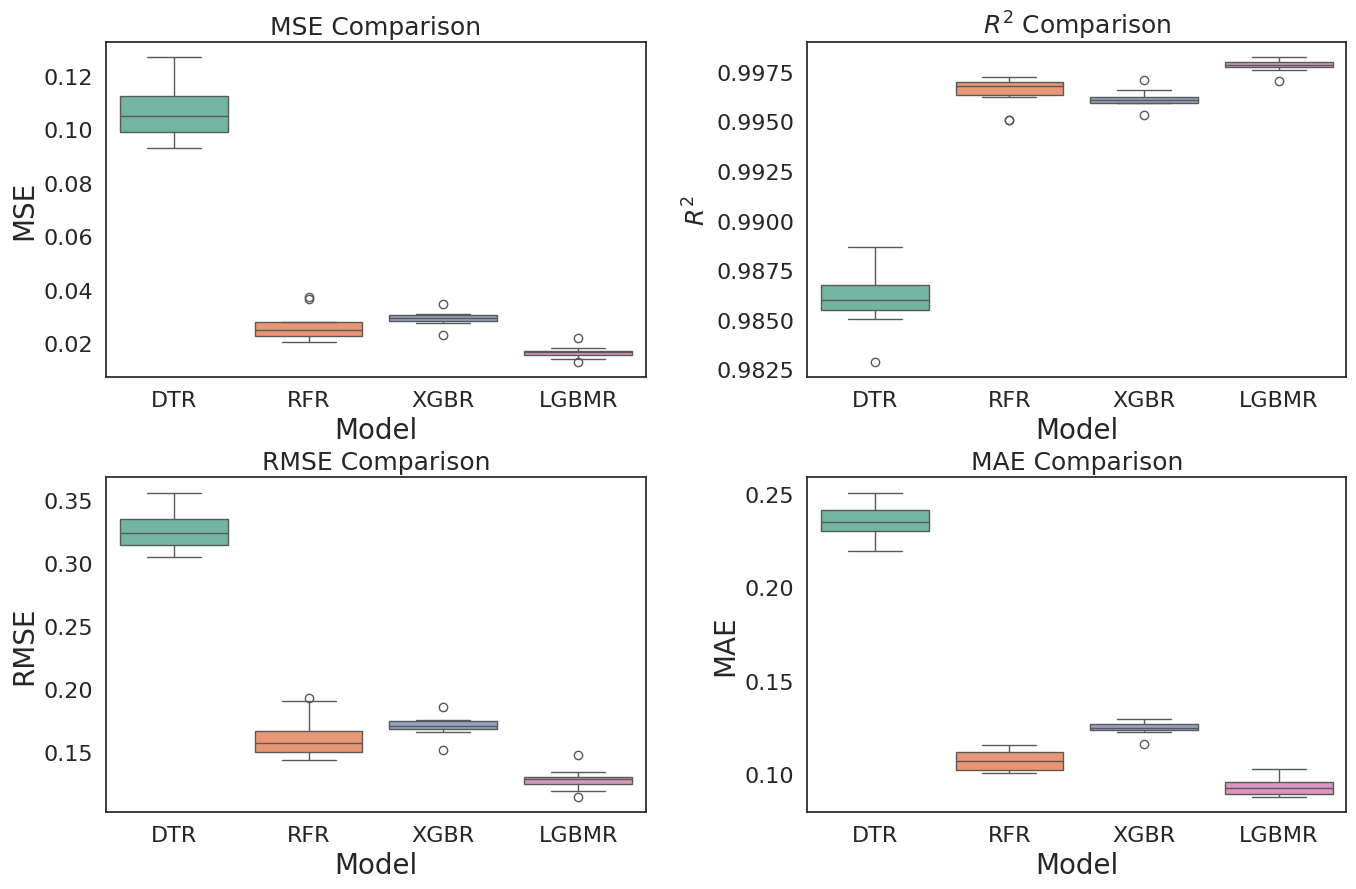

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define model names for plotting
model_names = {'Decision Tree': 'DTR', 'Random Forest': 'RFR', 'XGBoost': 'XGBR', 'LightGBM': 'LGBMR'}

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust vertical and horizontal spacing

# Loop through metrics and assign each subplot
metrics_to_compare = ['MSE', 'R2', 'RMSE', 'MAE']
for i, metric in enumerate(metrics_to_compare):
    row, col = i // 2, i % 2  # Calculate the row and column index

    # Create a DataFrame for the current metric
    data = []
    for model_name, scores in results.items():
        model_label = model_names[model_name]
        data.extend({'Model': model_label, 'Metric': metric, 'Score': score} for score in scores[metric])

    metric_df = pd.DataFrame(data)

    # Plot using Seaborn
    sns.boxplot(x="Model", y="Score", data=metric_df, ax=axes[row, col], palette="Set2", order=['DTR', 'RFR', 'XGBR', 'LGBMR'])
    axes[row, col].set_title(f'{metric} Comparison', fontsize=18)
    axes[row, col].set_xlabel('Model', fontsize=20)
    axes[row, col].set_ylabel(metric, fontsize=20)

    # Increase tick label font size
    axes[row, col].tick_params(axis='both', which='major', labelsize=16)

# Use LaTeX formatting for R²
axes[0, 1].set_title(r'$R^2$ Comparison', fontsize=18)
axes[0, 1].set_ylabel(r'$R^2$', fontsize=18)

# Save the plot as an image file with 400 DPI resolution
plt.savefig("all_weather_model_comparison_plot.png", dpi=400, bbox_inches="tight")

# Download the plot from Colab
from google.colab import files
files.download("all_weather_model_comparison_plot.png")

# Show the plot
plt.show()


Feature Importance

<ipython-input-27-2086000822c7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


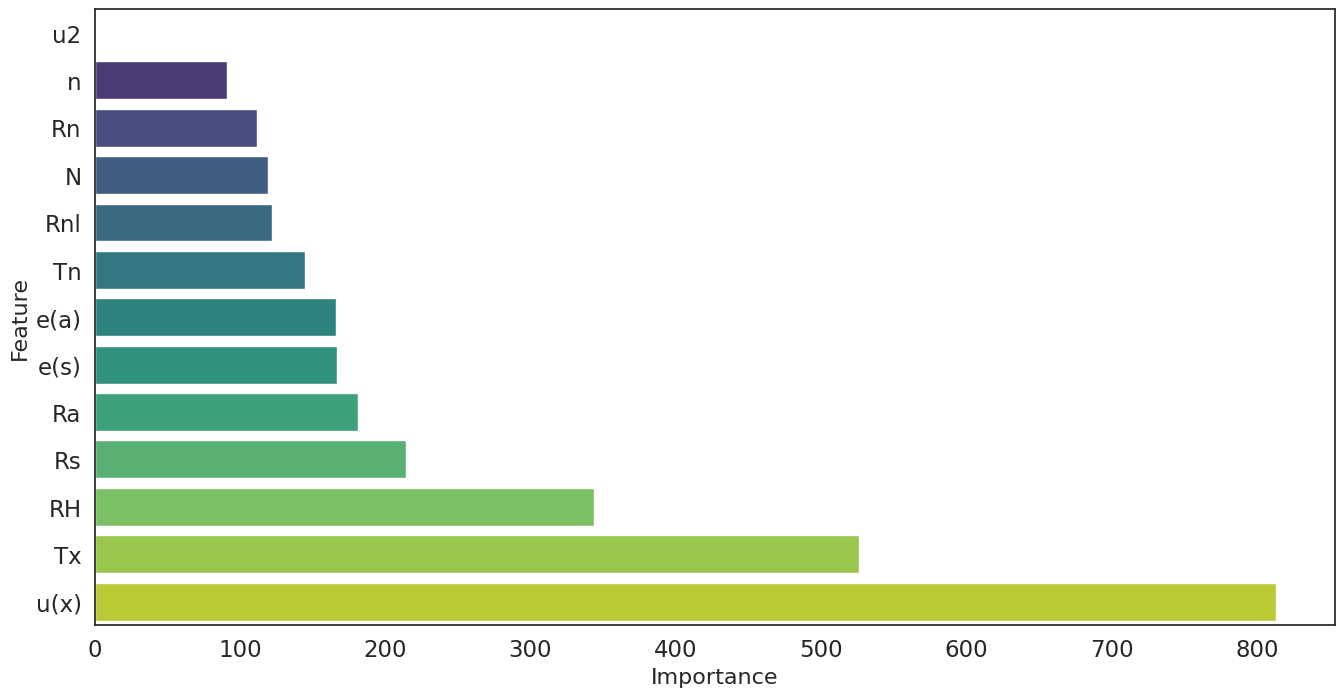

In [27]:
# Get feature importances
feature_importances = lgbm_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order (highest importance at the top)
feature_importance_df = feature_importance_df.sort_values(by='Importance')

# Plot feature importances
plt.figure(figsize=(16, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")

plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature', fontsize=16)

plt.show()


**LGBMR with different weather parameter**

In [ ]:
import lightgbm as lightgbm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize lists to store evaluation metrics
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []   # Add MSE scores

# Train 12 different LGBM models with incremental addition of features
for i in range(1, 13):
    # Select the top i features based on importance
    top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(i)['Feature'].tolist()

    # Use only the selected features for this model
    X_train_selected = X_train[top_features]
    X_test_selected = X_test[top_features]

    # Initialize the LGBM Regressor model (you can adjust hyperparameters)
    lgbm_model = lightgbm.LGBMRegressor(n_estimators=100, random_state=0)

    # Fit the model on selected features
    lgbm_model.fit(X_train_selected, y_train)

    # Make predictions on the testing data
    y_pred = lgbm_model.predict(X_test_selected)

    # Calculate RMSE, R-squared (R2), MAE, and MAPE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Calculate MAPE
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)

    # Append results to the respective lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)    # Append MSE scores

    # Print results for each feature set
    print(f"Features selected: {i}")
    print(f"Selected Features: {top_features}")
    print(f"RMSE: {rmse}")
    print(f"R-squared (R2): {r2}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape:.2f}%")  # Display MAPE as a percentage
    print(f"MSE: {mse}")
    print("\n")



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 1
[LightGBM] [Info] Start training from score 7.244554
Features selected: 1
Selected Features: ['u(x)']
RMSE: 2.5551507554668325
R-squared (R2): 0.21036298833064582
MAE: 2.2275835194921365
MAPE: 40.91%
MSE: 6.528795383162725


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 499
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 2
[LightGBM] [Info] Start training from score 7.244554
Features selected: 2
Selected Features: ['u(x)', 'Tx']
RMSE: 0.5781042863512097
R-squared (R2): 0.9595790219766657
MAE: 0.43560629254830163
MAPE: 7.94

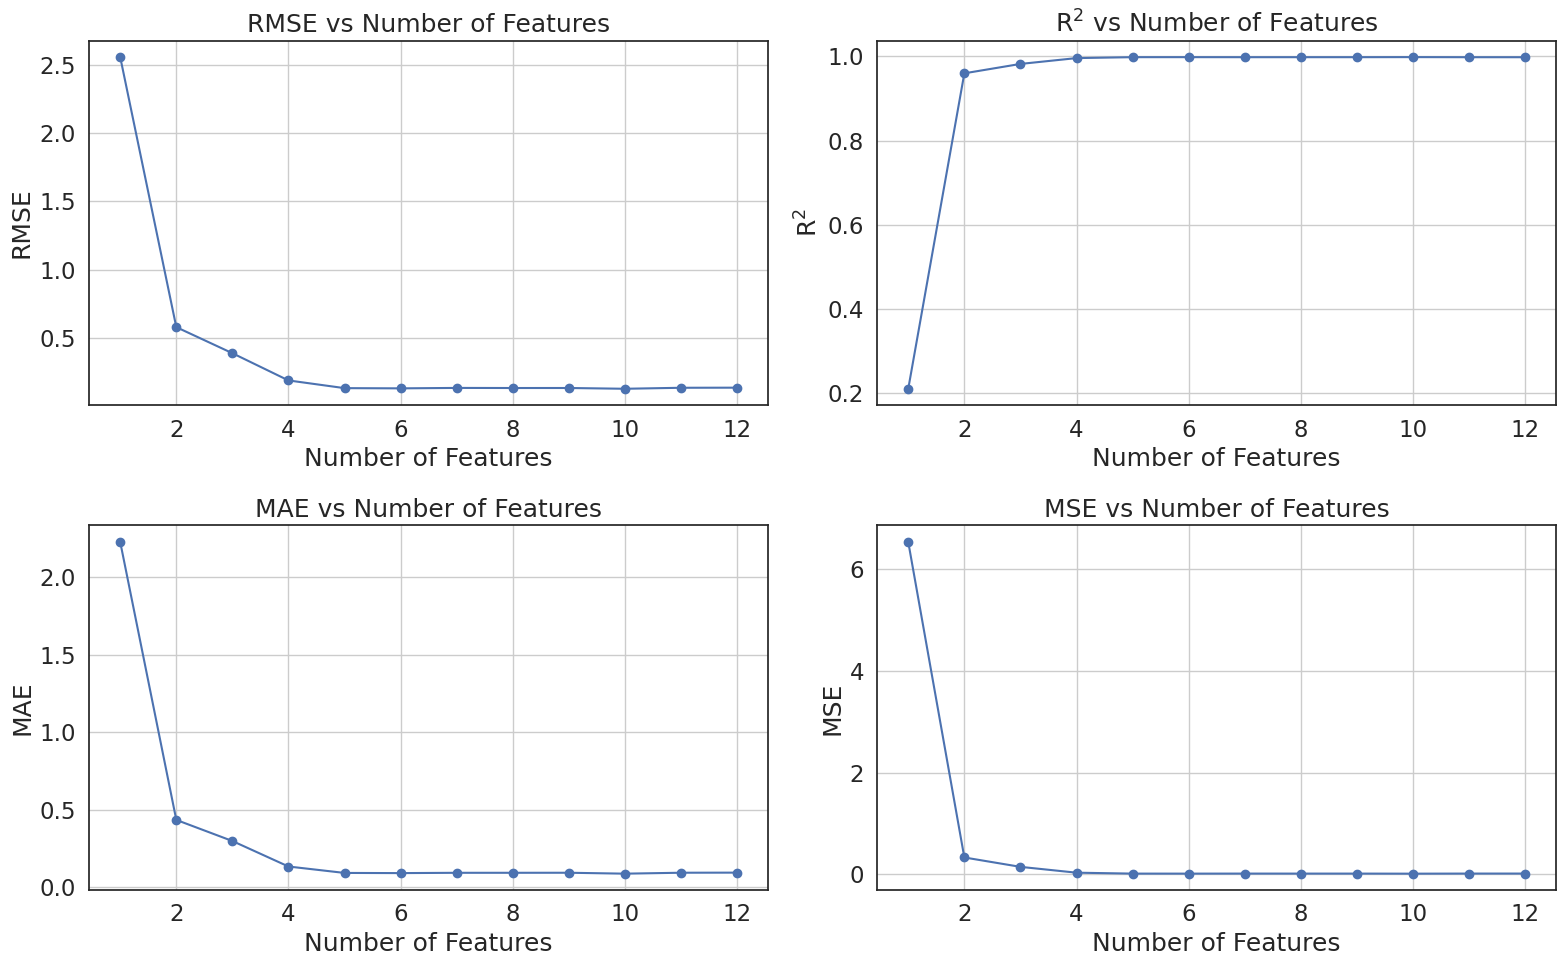

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Plot RMSE
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.plot(range(1, 13), rmse_scores, marker='o')
plt.title('RMSE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.grid(True)

# Plot R-squared
plt.subplot(2, 2, 2)
plt.plot(range(1, 13), r2_scores, marker='o')  # Adjusted the range to match the number of features
plt.title('R$^2$ vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('R$^2$')  # Use LaTeX formatting for superscript 2
plt.grid(True)

# Plot MAE
plt.subplot(2, 2, 3)
plt.plot(range(1, 13), mae_scores, marker='o')
plt.title('MAE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('MAE')
plt.grid(True)

# Plot MSE
plt.subplot(2, 2, 4)
plt.plot(range(1, 13), mse_scores, marker='o')
plt.title('MSE vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.grid(True)

plt.tight_layout()

# Save the figure with 400 DPI
plt.savefig('evaluation_metrics_plot.png', dpi=400)

# Show the plot
plt.show()

# Download the saved image
from google.colab import files
files.download('evaluation_metrics_plot.png')



**PCA analysis**

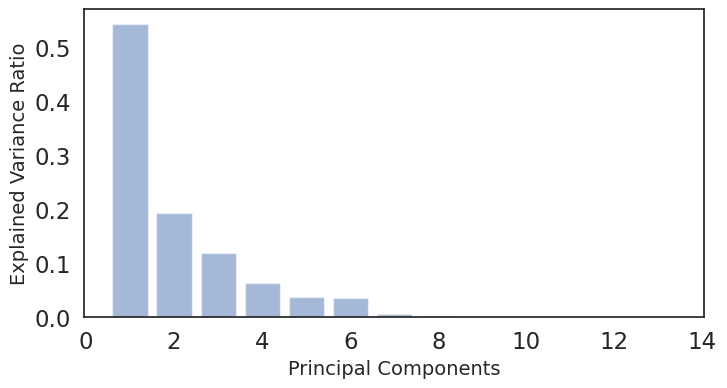

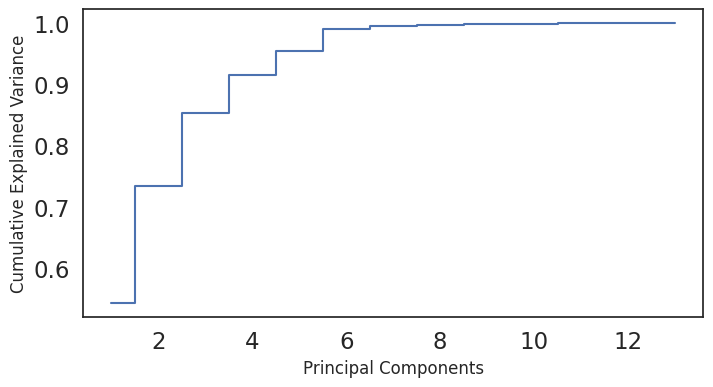

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame 'X' with all your features
# First, you should standardize the data (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the number of components you want
pca = PCA(n_components=len(X.columns))  # You can reduce this number based on your needs

# Fit and transform the data
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Increase font size of labels and ticks
plt.rcParams.update({'font.size': 8})

# Plot Explained Variance Ratio
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components',fontsize=14)
plt.ylabel('Explained Variance Ratio',fontsize=14)


# Save the figure to your hard disk
plt.savefig('explained_variance_ratio.png', bbox_inches='tight', dpi=300)

# Plot Cumulative Explained Variance
plt.figure(figsize=(8, 4))
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_variance, where='mid')
plt.xlabel('Principal Components',fontsize=12)
plt.ylabel('Cumulative Explained Variance',fontsize=12)


# Save the figure to your hard disk
plt.savefig('cumulative_explained_variance.png', bbox_inches='tight', dpi=300)

# Show the plots
plt.show()

# Optionally, you can also download the figures using Python code:
from google.colab import files

# Download the Explained Variance Ratio plot
files.download('explained_variance_ratio.png')

# Download the Cumulative Explained Variance plot
files.download('cumulative_explained_variance.png')


In [ ]:
# Create a PCA instance
pca = PCA()

# Fit the PCA model to your training data
pca.fit(X_train)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumulative_variance_ratio >= 1) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 100% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

# Determine the number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.99) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 99% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 95% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.90) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 90% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.80) + 1  # Add 1 because indexing starts from 0

# Print the number of components required for 95% variance
print(f'Number of components required for 85% variance: {n_components_95}')

# Transform your data using the selected number of components
X_train_pca_95 = pca.transform(X_train)[:, :n_components_95]
X_test_pca_95 = pca.transform(X_test)[:, :n_components_95]

Number of components required for 100% variance: 12
Number of components required for 99% variance: 4
Number of components required for 95% variance: 3
Number of components required for 90% variance: 2
Number of components required for 85% variance: 1


In [ ]:
import plotly.express as px
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Assuming you uploaded a CSV file named 'my_dataset.csv'
file_name = 'ET_Riaz_5.csv'

# Read the uploaded CSV file into a DataFrame
df = pd.read_csv(file_name)

# Now, you can work with the DataFrame 'df' as you would with any other pandas DataFrame.

sns.set_theme(style="white", font_scale=1.5)
# Load the example planets dataset
df1=df.drop(['Day','Month','Year'],axis=1)
column_order = ['Tx', 'Tn', 'RH', 'u(x)', 'Rs', 'e(a)', 'e(s)', 'u2', 'Ra', 'n', 'N', 'Rnl', 'Rn', 'ETo']
df1 = df1[column_order]
df1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
df3=df1.drop(['Tx', 'Tn', 'RH', 'u(x)', 'Rs', 'e(a)', 'e(s)', 'u2', 'Ra', 'n', 'N', 'Rnl', 'Rn'],axis=1)
y=df3
y
X=df1.drop(['ETo'],axis=1)
X=df1.drop(['ETo'],axis=1)
# Assuming X is your feature matrix with columns 'u(x)', 'Tx', 'RH', 'Rs', 'RA'
selected_features = ['u(x)', 'Tx', 'RH', 'Rs', 'Ra']
X_reduced = X[selected_features]

# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=0)

# Convert the y_train and y_test DataFrames to 1D arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create models with default hyperparameters
random_forest_model_reduced = RandomForestRegressor()
xgb_model_reduced = XGBRegressor()
lgbm_model_reduced = LGBMRegressor()
decision_tree_model_reduced = DecisionTreeRegressor()

# Define the number of folds for cross-validation
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

# Create a dictionary to store results and hyperparameters for each model
results_reduced = {}

# Convert X_train_reduced to a NumPy array to simplify indexing
X_train_reduced_np = X_train_reduced.to_numpy()

# Perform 10-fold cross-validation for each model
for model_name, model in [('RFR-X$_5$', random_forest_model_reduced), ('XGBR-X$_5$', xgb_model_reduced), ('LGMR-X$_5$', lgbm_model_reduced), ('DTR-X$_5$', decision_tree_model_reduced)]:
    mse_scores = []
    r2_scores = []
    rmse_scores = []
    mae_scores = []

    for train_index, val_index in kf.split(X_train_reduced):
        X_train_fold, X_val_fold = X_train_reduced_np[train_index], X_train_reduced_np[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        r2 = r2_score(y_val_fold, y_val_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_val_fold, y_val_pred)

        mse_scores.append(mse)
        r2_scores.append(r2)
        rmse_scores.append(rmse)
        mae_scores.append(mae)

    # Store results and hyperparameters for the current model
    results_reduced[model_name] = {
        'Hyperparameters': model.get_params(),
        'MSE': mse_scores,
        'R2': r2_scores,
        'RMSE': rmse_scores,
        'MAE': mae_scores
    }

# Print results for reduced features
for model_name, metrics in results_reduced.items():
    print(f"Model: {model_name}")
    print(f"Hyperparameters: {metrics['Hyperparameters']}")
    print(f"Mean MSE: {np.mean(metrics['MSE'])}")
    print(f"Mean R2: {np.mean(metrics['R2'])}")
    print(f"Mean RMSE: {np.mean(metrics['RMSE'])}")
    print(f"Mean MAE: {np.mean(metrics['MAE'])}")
    print("\n")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 5
[LightGBM] [Info] Start training from score 7.240462
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1246
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 5
[LightGBM] [Info] Start training from score 7.235094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1249
[LightGBM] [Info] Number of data points in the train set: 5850, number of used features: 5
[LightGBM] [Info] Start training 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

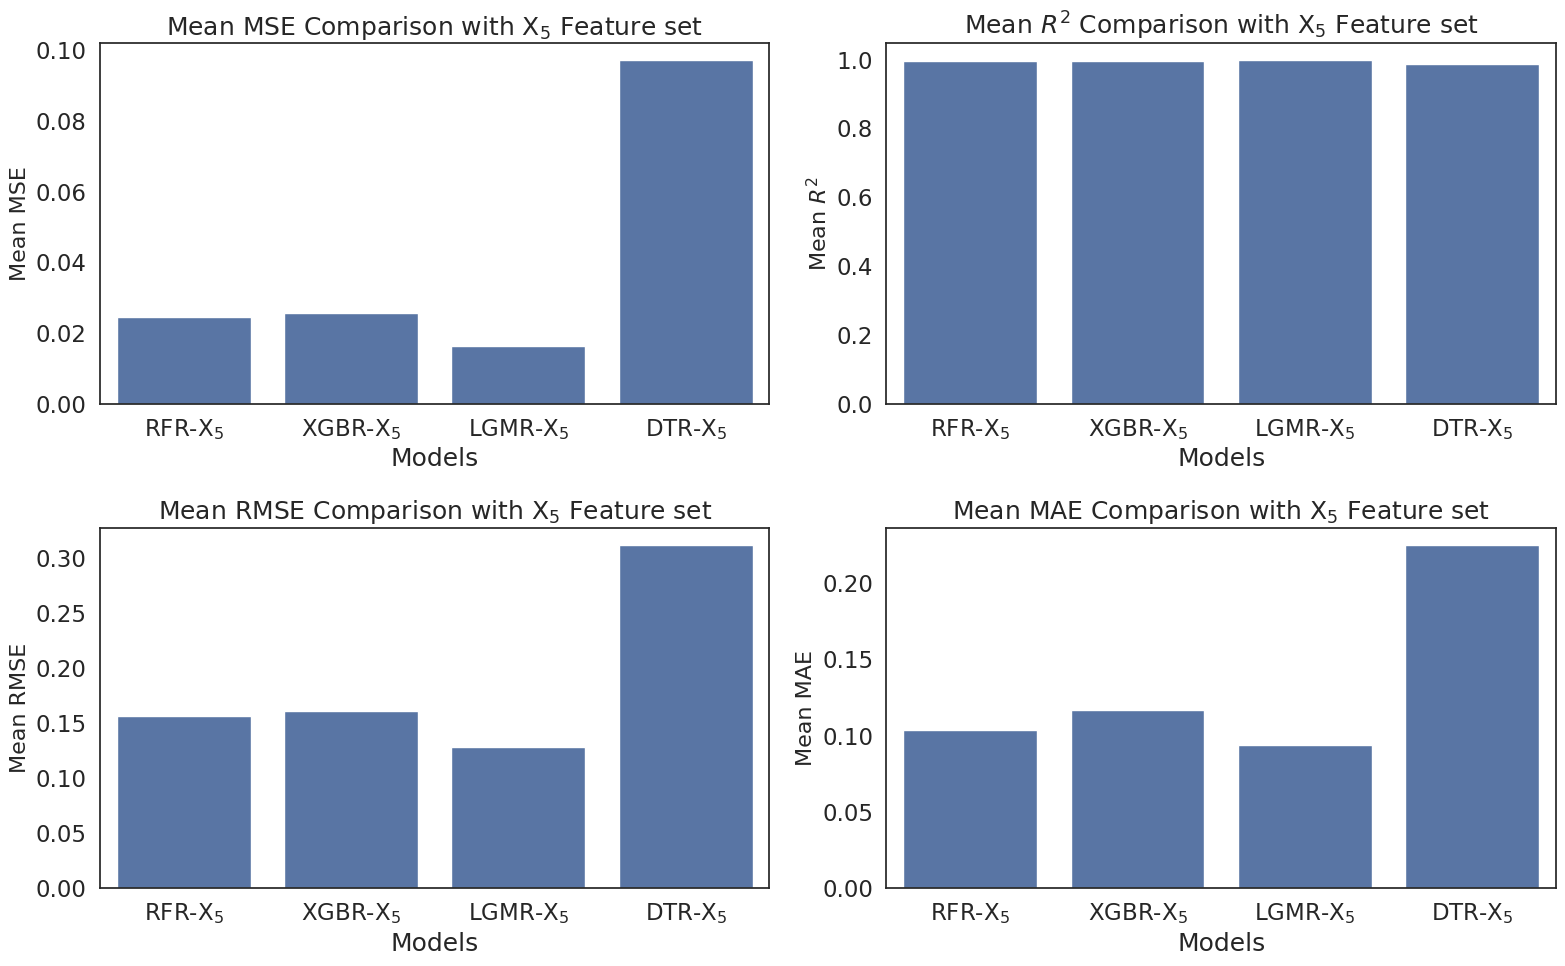

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Create a DataFrame from the results_reduced dictionary for easy plotting
results_reduced_df = pd.DataFrame(results_reduced)

# Transpose the DataFrame for a better structure
results_reduced_df = results_reduced_df.T

# Define the metrics to plot
metrics_to_plot = ['MSE', 'R2', 'RMSE', 'MAE']

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Loop through each metric and create a bar plot in the corresponding subplot
for i, metric in enumerate(metrics_to_plot):
    row = i // 2
    col = i % 2
    if metric == 'R2':
        # Use LaTeX formatting for R²
        sns.barplot(x=results_reduced_df.index, y=results_reduced_df[metric].apply(np.mean), ax=axes[row, col])
        axes[row, col].set_title(f'Mean $R^2$ Comparison with X$_{5}$ Feature set', fontsize=18)
        axes[row, col].set_ylabel(f'Mean $R^2$', fontsize=16)
    else:
        sns.barplot(x=results_reduced_df.index, y=results_reduced_df[metric].apply(np.mean), ax=axes[row, col])
        axes[row, col].set_title(f'Mean {metric} Comparison with X$_{5}$ Feature set', fontsize=18)
        axes[row, col].set_ylabel(f'Mean {metric}', fontsize=16)

    axes[row, col].set_xlabel('Models', fontsize=18)

    axes[row, col].tick_params(axis='x')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure with 400 dpi
plt.savefig('mean_comparison_plot.png', dpi=400)

# Download the saved figure from Colab
files.download('mean_comparison_plot.png')





**LGBMR with Standard Value**

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3265
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 16
[LightGBM] [Info] Start training from score 7.244554
Mean Squared Error (MSE): 0.018184210933749195
R-squared (R2): 0.9978006775923287
Spearman Correlation: 1.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

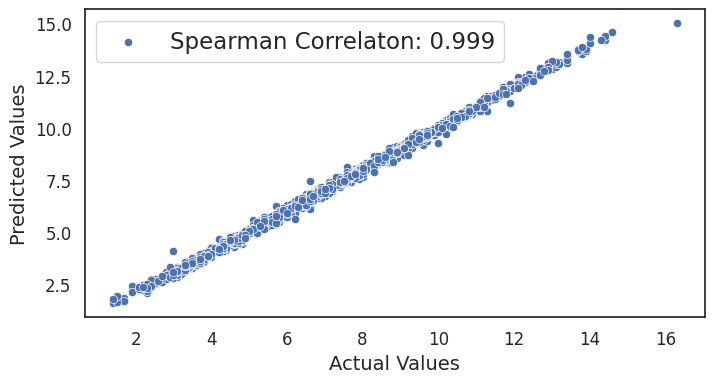

In [ ]:
import numpy as np

# Assuming you have already defined df and y...

# Selecting all features from the DataFrame except the target variable (y)
X = df.drop(columns=['ETo'])

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an LGBMRegressor model
lgbm_model = LGBMRegressor()

# Train the LGBMRegressor model with all features
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Calculate Spearman correlation coefficient
spearman_corr, _ = spearmanr(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Spearman Correlation: {spearman_corr:.2f}')

# Create a correlation plot between predicted and actual values
plt.figure(figsize=(8, 4))
sns.scatterplot(x=np.array(y_test), y=y_pred, label=f'Spearman Correlaton: {spearman_corr:.3f}')

plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add text for the legend


# Save the figure with 500 DPI
plt.savefig('1correlation_plot_500dpi.png', dpi=500)

# Download the saved figure from Colab
files.download('1correlation_plot_500dpi.png')

# Show the plot
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1009
[LightGBM] [Info] Number of data points in the train set: 6500, number of used features: 4
[LightGBM] [Info] Start training from score 7.244554
Mean Squared Error (MSE): 0.03531861245584839
R-squared (R2): 0.9957283262900432
Spearman Correlation: 1.00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

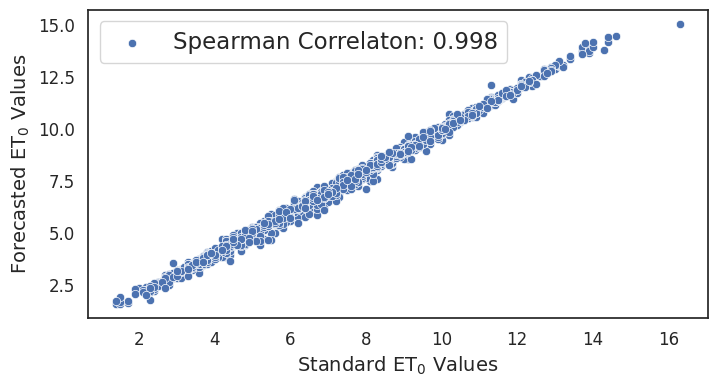

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr
import pandas as pd

# Assuming you have already defined df, X, and y...
X_subset = df[['u(x)', 'Tx', 'RH','Rs']]  # Subset of features: 'u(x)', 'Tx', 'RH'
y = df['ETo']  # Target: 'ETo'
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=0)

# Create an LGBMRegressor model
lgbm_model = LGBMRegressor()

# Train the LGBMRegressor model with all features
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_model.predict(X_test)

# Calculate Spearman correlation coefficient
spearman_corr, _ = spearmanr(y_test, y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Spearman Correlation: {spearman_corr:.2f}')

# Create a correlation plot between predicted and actual values with the legend
plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_test, y=y_pred, label=f'Spearman Correlaton: {spearman_corr:.3f}')

plt.xlabel('Standard ET$_0$ Values',fontsize=14)
plt.ylabel('Forecasted ET$_0$ Values',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.savefig('2correlation_plot_500dpi.png', dpi=500)

# Download the saved figure from Colab
files.download('2correlation_plot_500dpi.png')
plt.show()

plt.show()

